In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

gb_clf = ensemble.GradientBoostingClassifier()


df = pd.read_csv('default_of_credit_card_clients.csv')
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
              'X11','X12','X13','X14','X15','X16','X17','X18',
              'X19','X20','X21','X22','X23','Y']
 
#LIMIT_BAL  = X1        #SEX        = X2          #EDUCATION = X3      #MARRIAGE = X4       #AGE = X5
#PAY_0      = X6        #PAY_2      = X7          #PAY_3     = X8      #PAY_4    = X9       #PAY_5 = X10
#PAY_6      = X11       #BILL_AMT1 = X12          #BILL_AMT2 = X13     #BILL_AMT3= X14      #BILL_AMT4=X15
#BILL_AMT5  = X16       #BILL_AMT6 = X17          #PAY_AMT1 = X18      #PAY_AMT2 = X19      #PAY_AMT3 = X20
#PAY_AMT4   = X21       #PAY_AMT5  = X22          #PAY_AMT6 = X23      #default payment next month = Y


Relevant Data Withholding Variable:  X1
Accuracy: 0.8191428571428572
Precision: 0.678951678951679
Recall: 0.3548801369863014
 
Relevant Data Withholding Variable:  X2
Accuracy: 0.8178095238095238
Precision: 0.6732186732186732
Recall: 0.3518835616438356
 
Relevant Data Withholding Variable:  X3
Accuracy: 0.8187619047619048
Precision: 0.6773136773136773
Recall: 0.3540239726027397
 
Relevant Data Withholding Variable:  X4
Accuracy: 0.818
Precision: 0.6763485477178424
Recall: 0.3488869863013699
 
Relevant Data Withholding Variable:  X5
Accuracy: 0.817047619047619
Precision: 0.6702214930270713
Recall: 0.3497431506849315
 
Relevant Data Withholding Variable:  X6
Accuracy: 0.8014285714285714
Precision: 0.6217264791464597
Recall: 0.2744006849315068
 
Relevant Data Withholding Variable:  X7
Accuracy: 0.8185714285714286
Precision: 0.6767842493847416
Recall: 0.3531678082191781
 
Relevant Data Withholding Variable:  X8
Accuracy: 0.8180952380952381
Precision: 0.6740196078431373
Recall: 0.3531678082

C:\murach\SpyderPython\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Relevant Data Withholding Variable:  X21
Accuracy: 0.8192380952380952
Precision: 0.6798029556650246
Recall: 0.3544520547945205
 


C:\murach\SpyderPython\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Relevant Data Withholding Variable:  X22
Accuracy: 0.8186666666666667
Precision: 0.6773399014778325
Recall: 0.3531678082191781
 


C:\murach\SpyderPython\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Relevant Data Withholding Variable:  X23
Accuracy: 0.8185714285714286
Precision: 0.6773662551440329
Recall: 0.3523116438356164
 


C:\murach\SpyderPython\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


Relevant Data Withholding Variable:  Y
Accuracy: 0.8179047619047619
Precision: 0.6729200652528549
Recall: 0.3531678082191781
 


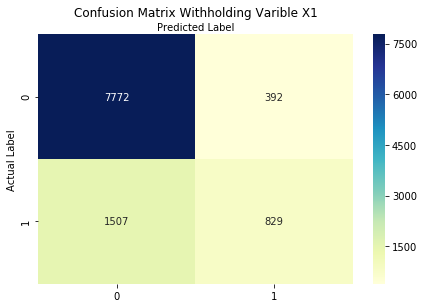

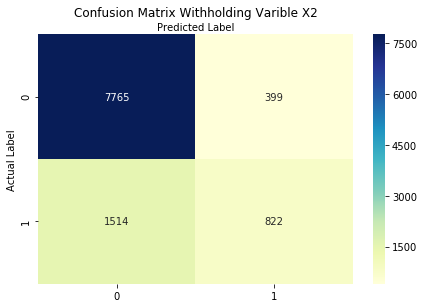

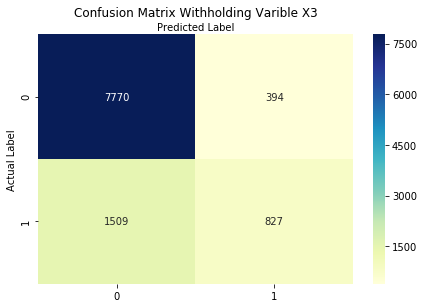

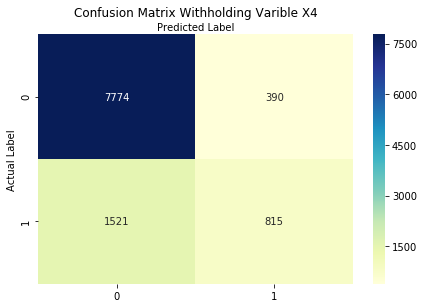

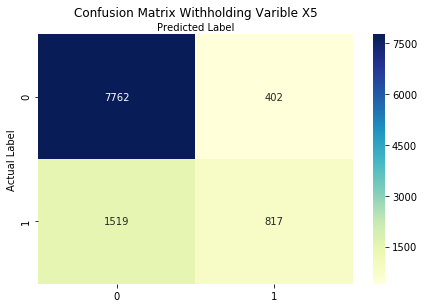

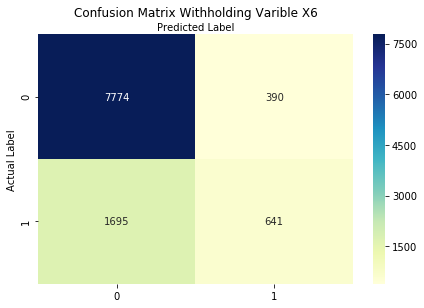

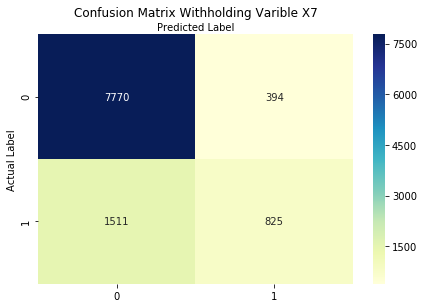

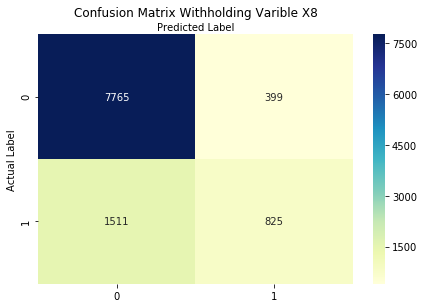

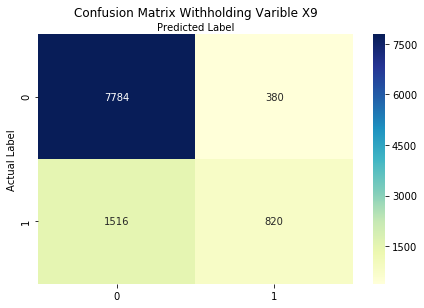

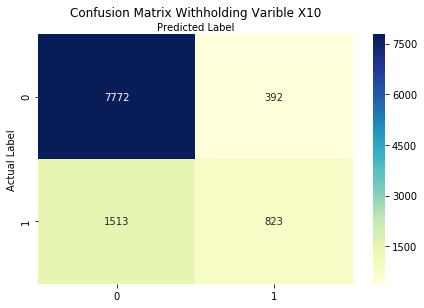

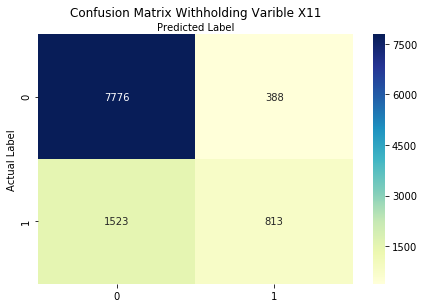

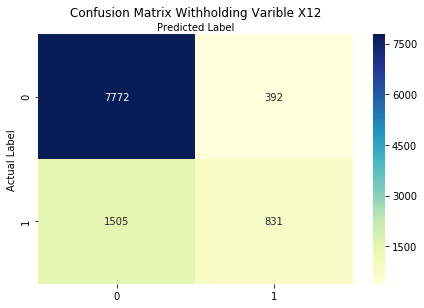

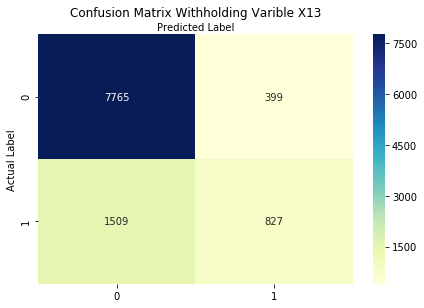

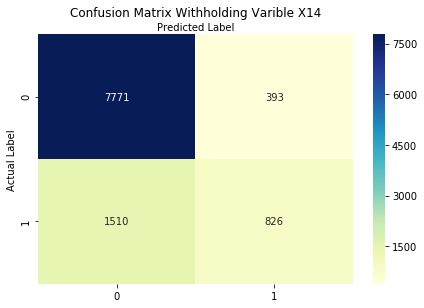

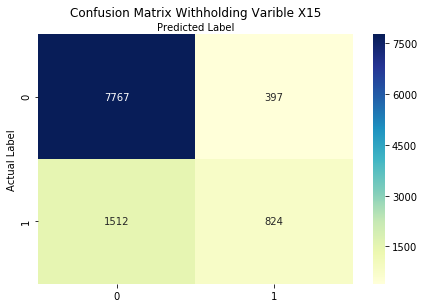

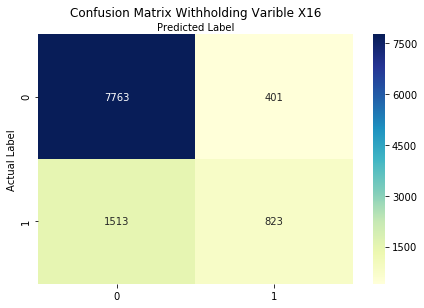

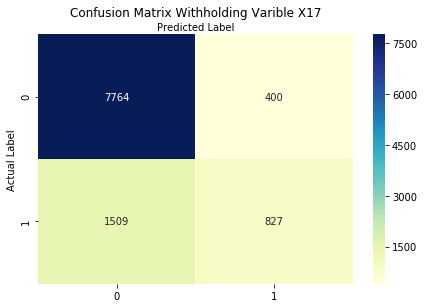

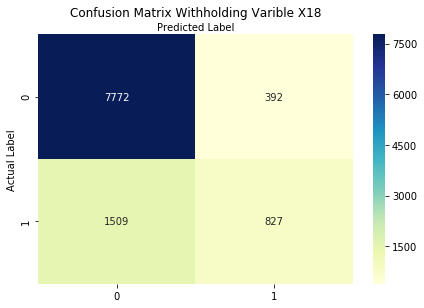

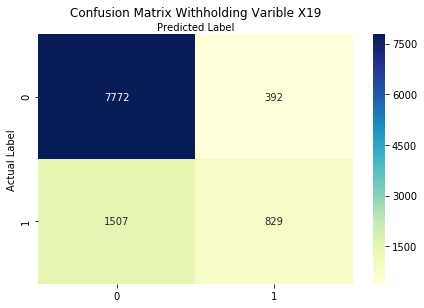

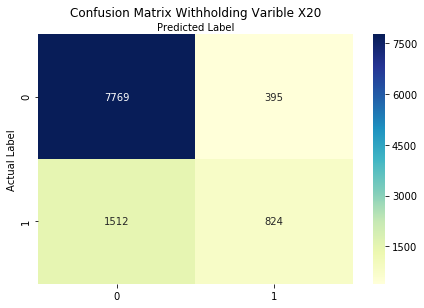

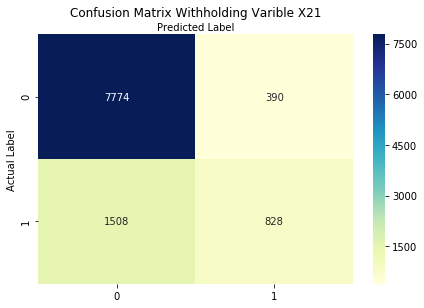

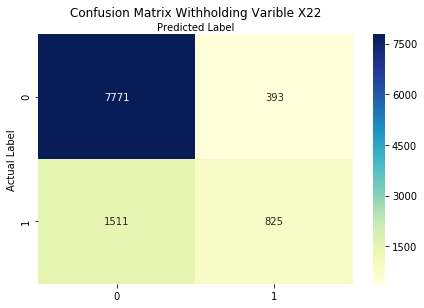

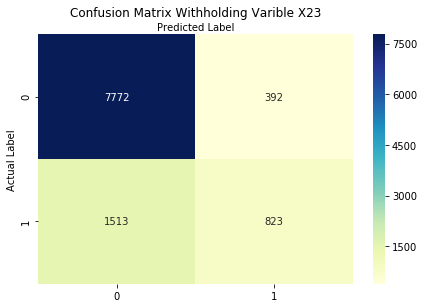

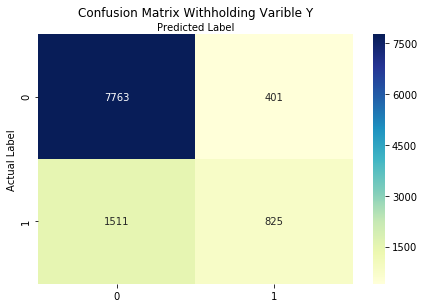

In [5]:
for column in (df.columns):
    x = df.drop([column,'Y'],axis = 1)
    y = df.Y
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=12340)
    gb_clf.fit(x_train, y_train)
    gb_clf.score(x_test, y_test)
    y_pred = gb_clf.predict(x_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cnf_matrix
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion Matrix Withholding Varible ' + column, y=1.1)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    print("Relevant Data Withholding Variable: ", column)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print(" ")

In [6]:
#After seeing which variables, when removed, imporved accuracy, they were collectively removed in an ultimate test.
x = df.drop(['X7','X9','X20','X21','X23','Y'],axis = 1)
y = df.Y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=12340)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
print("Accuracy:",gb_clf.score(x_test, y_test))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8192380952380952
Precision: 0.681592039800995
Recall: 0.3518835616438356


In [7]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[7780  384]
 [1514  822]]


Text(0.5, 257.44, 'Predicted Label')

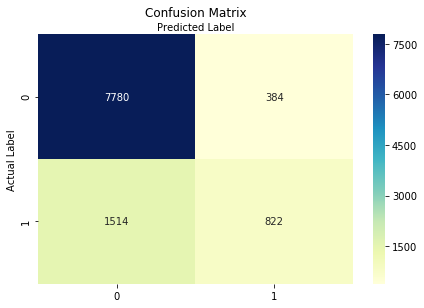

In [8]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

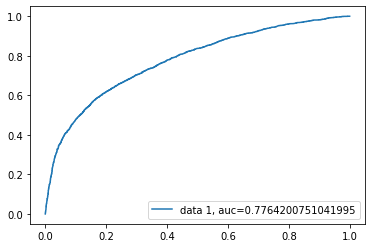

In [9]:
y_pred_proba = gb_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()